# Telecom Churn EDA Notebook
## EDA & Hypothesis Testing

This notebook will consist of EDA & Hypothesis Testing for a telecom churn dataset. This notebook is a prelude to the churn classification prediction analysis that will follow. You can find the dataset online [here](https://www.kaggle.com/datasets/jpacse/datasets-for-churn-telecom?select=cell2cellholdout.csv).

### Objective

The objective of the analysis is to use customer segmentation and behaviour data to predict whether or not a customer is going to churn from the company.

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [2]:
data = pd.read_csv("churn dataset.csv")
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
print(f"number of rows: {data.shape[0]} \nnumber of features: {data.shape[1]}")

number of rows: 51047 
number of features: 58


In [4]:
type_df = pd.DataFrame(data.dtypes).reset_index().rename(columns={'index':'feature', 0:'type'})
# check distribution of data types
type_df['type'].value_counts()

type
float64    26
object     23
int64       9
Name: count, dtype: int64

We will need to perform some significant label encoding for the 23 object columns.

In [5]:
# summary statistics for our numerical columns
pd.set_option('display.max_columns', None)
data.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


Some key takeaways:
* there appears to be some **missing data** in a lot of the features - we will need to find a way of dealing with that
* from first glance, it looks like we will have to handle some **outliers** in a lot of the numerical features.
    * e.g. MonthlyRevenue 75% = 71; std = 44; *max = 1223*
* we will need to perform some **scaling** on the numerical data 


## Data Pre-Processing

### Handling Missing Data

In [6]:
# Understand the scale of the problem
missing_data = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)).reset_index().rename(columns={'index':'feature', 0:'missing_values'})
missing_data = missing_data[missing_data['missing_values'] > 0]
missing_data

,feature,missing_values
0,AgeHH2,909
1,AgeHH1,909
2,PercChangeMinutes,367
3,PercChangeRevenues,367
4,MonthlyRevenue,156
5,MonthlyMinutes,156
6,TotalRecurringCharge,156
7,DirectorAssistedCalls,156
8,OverageMinutes,156
9,RoamingCalls,156


We have 14 features with missing data. The max proportion of missing data is very small though - 909 / 51047 = 1.78%. Also, the number of features with missing data equates to only 25% of our total features. So it's probably not the best idea to remove these observations from the dataset as we'd be losing a lot of good data. We will thus replace these missing values with the mean or median of each column.

In [7]:
missing_data_full = data.loc[:, list(missing_data['feature'])]
missing_data_full = missing_data_full.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13]]

In [8]:
missing_data_full

,AgeHH2,AgeHH1,PercChangeMinutes,PercChangeRevenues,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,CurrentEquipmentDays,Handsets,HandsetModels
0,0.0,62.0,-157.0,-19.0,24.00,219.0,22.0,0.25,0.0,0.0,361.0,2.0,2.0
1,42.0,40.0,-4.0,0.0,16.99,10.0,17.0,0.00,0.0,0.0,1504.0,2.0,1.0
2,26.0,26.0,-2.0,0.0,38.00,8.0,38.0,0.00,0.0,0.0,1812.0,1.0,1.0
3,0.0,30.0,157.0,8.1,82.28,1312.0,75.0,1.24,0.0,0.0,458.0,9.0,4.0
4,54.0,46.0,0.0,-0.2,17.14,0.0,17.0,0.00,0.0,0.0,852.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,64.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,526.0,2.0,2.0
51043,48.0,48.0,122.0,15.9,95.17,1745.0,85.0,0.99,45.0,4.7,464.0,2.0,2.0
51044,0.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,3.0,2.0
51045,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433.0,2.0,2.0


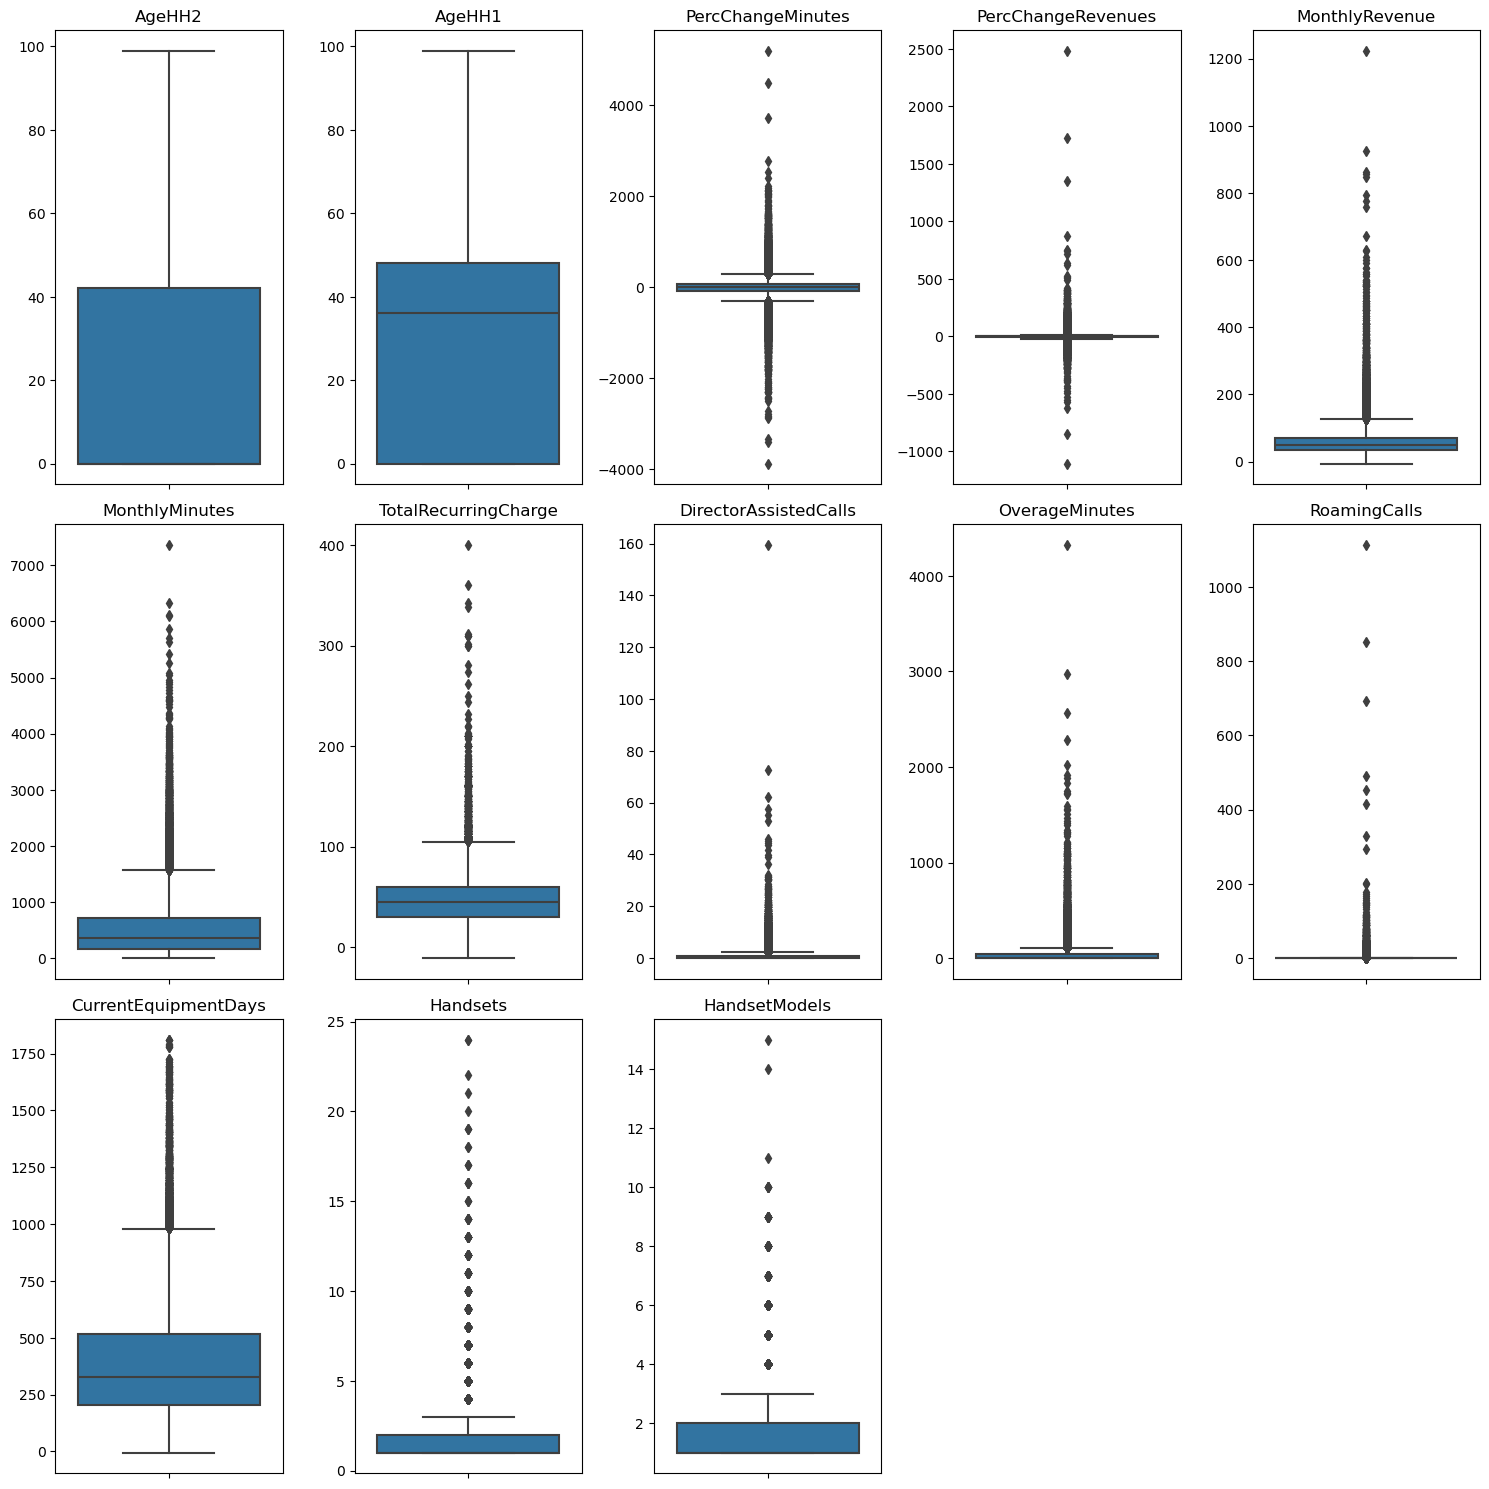

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15, 15)

# Flatten the axs array to iterate over it
axs = axs.flatten()

# Iterate through both columns and axes
for i, col in enumerate(missing_data_full.columns):
    sns.boxplot(data=missing_data_full, y=col, ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

# Hide any extra subplots if the number of columns is less than 16
for ax in axs[len(missing_data_full.columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

#### Treatment for missing values for each feature

##### AgeHH1 / AgeHH2

In [10]:
print(data[data['AgeHH1'] == 0].shape[0])
print(data[data['AgeHH2'] == 0].shape[0])

13917
26087


In addition to the missing data, a lot of this data is 0. For AgeHH2, the median is actually 0. And as we can see this means half the data is missing for this feature as obviously, a customer can't be 0 years old. It isn't clear to me what the AgeHH2 feature is saying that's different to AgeHH1. We will thus **drop** the AgeHH2 feature from the dataset. <br>
We have c.25% missing data for AgeHH1 which is also a lot.

In [11]:
print(missing_data_full['AgeHH1'].mean())
print(missing_data_full['AgeHH1'].median())

31.338126770114485
36.0


Both masking the data and replacing it with a common value introduce some degree of uncertainty into the model as we're transforming about 1/4 of the records. However, since the mean and median are relatively close for AgeHH1, I'm more comfortable with replacing the data with one of those values. We will choose the **median** in this case to be slightmly more representative of the entire values.

##### PercChangeMinutes

In [12]:
pd.set_option('display.max_rows', 10)
#np.set_printoptions(threshold=10000)
pd.DataFrame(missing_data_full['PercChangeMinutes'].value_counts(normalize=True).sort_values(ascending=False))

,proportion
PercChangeMinutes,
0.0,0.022178
-2.0,0.008485
-4.0,0.007281
-8.0,0.006827
2.0,0.006669
...,...
-1210.0,0.000020
-1164.0,0.000020
-729.0,0.000020


In [13]:
print(missing_data_full['PercChangeMinutes'].mean())
print(missing_data_full['PercChangeMinutes'].median())

-11.547908445146014
-5.0


Wide distribution of data points in this feature asit refers to a percentage change for minutes usage. Only a few hundred data points missing in htis column so we will just replace with the **mean**.

##### PercChangeRevenues

In [14]:
print(missing_data_full['PercChangeRevenues'].mean())
print(missing_data_full['PercChangeRevenues'].median())

-1.19198500394633
-0.3


It's a similar story for PercChangeRevenues as it was for PerChangeMinutes. Again, we will replace missing values with the **mean**.

##### MonthlyRevenue

In [15]:
print(missing_data_full['MonthlyRevenue'].mean())
print(missing_data_full['MonthlyRevenue'].median())

58.834492346387385
48.46


Again, we can replace with either here and we'll go for the median to be more representative.

##### MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, RoamingCalls, CurrentEquipmentDays, Handsets, HandsetModels

All these columns will be treated the same. I don't see any reason not to replace the minimal missing values with the median.

##### ServiceArea

In [16]:
data['ServiceArea'].value_counts().head(1)

ServiceArea
NYCBRO917    1684
Name: count, dtype: int64

For our 1 feature with missing data, we have 24 missing values to deal with. Since this is such a small amount, we will just replace them with the value with the **most** data points: NYCBRO917.

In [17]:
np.float64(data['AgeHH1'].median())

36.0

In [18]:
# implement transformation decisions on the dataset
data.drop(columns='AgeHH2', inplace=True)
data['AgeHH1'].fillna(np.float64(data['AgeHH1'].median()), inplace=True)
data['PercChangeMinutes'].fillna(data['PercChangeMinutes'].mean(), inplace=True)
data['PercChangeRevenues'].fillna(data['PercChangeRevenues'].mean(), inplace=True)
data['ServiceArea'].fillna('NYCBRO917', inplace=True)

for col in ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls','CurrentEquipmentDays', 'Handsets', 'HandsetModels']:
    data[col].fillna(np.float64(data[col].median()), inplace=True)


In [19]:
print(f"Number of missing values in dataset: {data.isnull().sum().sum()}")

Number of missing values in dataset: 0


### Handling Outliers

Even just from our missing data analysis, we can see that there is a high prevalence of outliers in the dataset. We will need to handle them carefully to ensure they do not have an unintended negative impact on our model. <br><br>
Really, what we want to do first is quantify the number of outliers we're dealing with for each feature. This will give us an idea of how to treat the outliers. We'll classify an outlier as any data point that is less than the **whiskerMin** or greater than the **whiskerMax** of each feature. In summary, whisker min and whisker max provide a representation of the spread of the data in a boxplot. They help identify the range of typical values and highlight potential outliers. The whiskerMin is calculated as the LowerQuartile * -*multiplier* and the whiskerMax is calculated as the UpperQuartile * *multiplier*. For our analysis, the multiplier will be 1.75 which is slightly more generous than the standard 1.5. 

In [20]:
data.dtypes.value_counts()

float64    25
object     23
int64       9
Name: count, dtype: int64

*We just need to determine how we're going to treat the `HandsetPrice` column first as this contains an "Unknown" field which converts it to an object field when it should be an integer.*

In [21]:
data['HandsetPrice'].unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

In [22]:
data['HandsetPrice'].value_counts()

HandsetPrice
Unknown    28982
30          7328
150         4115
130         2105
80          1960
           ...  
250           20
300           13
180           10
500            8
240            6
Name: count, Length: 16, dtype: int64

This is actually quite a lot of missing data - over 50%. Considering there is such a large volume we'll have to remove this feature from the dataset.

In [23]:
data.drop(columns='HandsetPrice', inplace=True)

In [24]:
numerical_data = data.select_dtypes(include=['float64', 'int64']).drop(columns="CustomerID")
text_data = data.select_dtypes(include='object').drop(columns="Churn")

In [25]:
numerical_data_stats = numerical_data.describe().reset_index().rename(columns={'index':'statistic'})
text_data_stats = text_data.describe().reset_index().rename(columns={'index':'statistic'})

In [26]:
whisker_dict_num = {}
for col in list(numerical_data.columns):
    whiskerMin = numerical_data_stats.loc[4, col] / 1.75
    whiskerMax = numerical_data_stats.loc[6, col] * 1.75
    whisker_dict_num[col] = (whiskerMin, whiskerMax)

whisker_df_num = pd.DataFrame.from_dict(whisker_dict_num)
whisker_df_num = whisker_df_num.reset_index().rename(columns={'index':'statistic'})
whisker_df_num['statistic'].replace({0:'whiskerMin', 1:'whiskerMax'}, inplace=True)

In [27]:
whisker_df_num

,statistic,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,whiskerMin,19.234286,90.857143,17.142857,0.0000,0.0,0.00,-46.857143,-3.942857,0.400,0.000,3.028571,0.000,0.000,4.742857,1.885714,0.000,13.142857,6.285714,0.971429,0.0,0.000,6.285714,0.571429,0.571429,0.571429,0.571429,117.142857,0.0,0.0,0.0,0.0,0.00,0.0
1,whiskerMax,124.180000,1263.500000,105.000000,1.7325,70.0,0.35,113.750000,2.712500,13.475,6.475,63.525000,2.975,0.525,268.625000,59.500000,16.275,212.275000,155.225000,21.525000,0.0,2.275,42.000000,3.500000,3.500000,3.500000,3.500000,901.250000,84.0,0.0,0.0,0.0,12.25,0.0


In [28]:
# identify number of outliers present in each feature
outlier_df = pd.DataFrame(columns=['feature','whiskerMin_under','whiskerMax_over'])

for col in list(numerical_data.columns):
    under_wm = data[data[col] < whisker_df_num.loc[0, col]].shape[0]
    over_wm = data[data[col] > whisker_df_num.loc[1, col]].shape[0]
    new_row = {'feature':col, 'whiskerMin_under':under_wm, 'whiskerMax_over':over_wm}
    outlier_df.loc[len(outlier_df)] = new_row
outlier_df

,feature,whiskerMin_under,whiskerMax_over
0,MonthlyRevenue,3502,3195
1,MonthlyMinutes,7851,4522
2,TotalRecurringCharge,4863,824
3,DirectorAssistedCalls,0,7025
4,OverageMinutes,0,8595
...,...,...,...
28,RetentionCalls,0,1745
29,RetentionOffersAccepted,0,881
30,ReferralsMadeBySubscriber,0,2384
31,IncomeGroup,0,0


C:\Users\UK45812347\AppData\Local\Temp\ipykernel_24508\2471089096.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.barplot(outlier_df.sort_values(by='whiskerMin_under', ascending=False)[outlier_df['whiskerMin_under'] > 0], x='feature', y='whiskerMin_under')
C:\Users\UK45812347\AppData\Local\Temp\ipykernel_24508\2471089096.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1 = sns.barplot(outlier_df.sort_values(by='whiskerMax_over', ascending=False)[outlier_df['whiskerMax_over'] > 0], x='feature', y='whiskerMax_over')


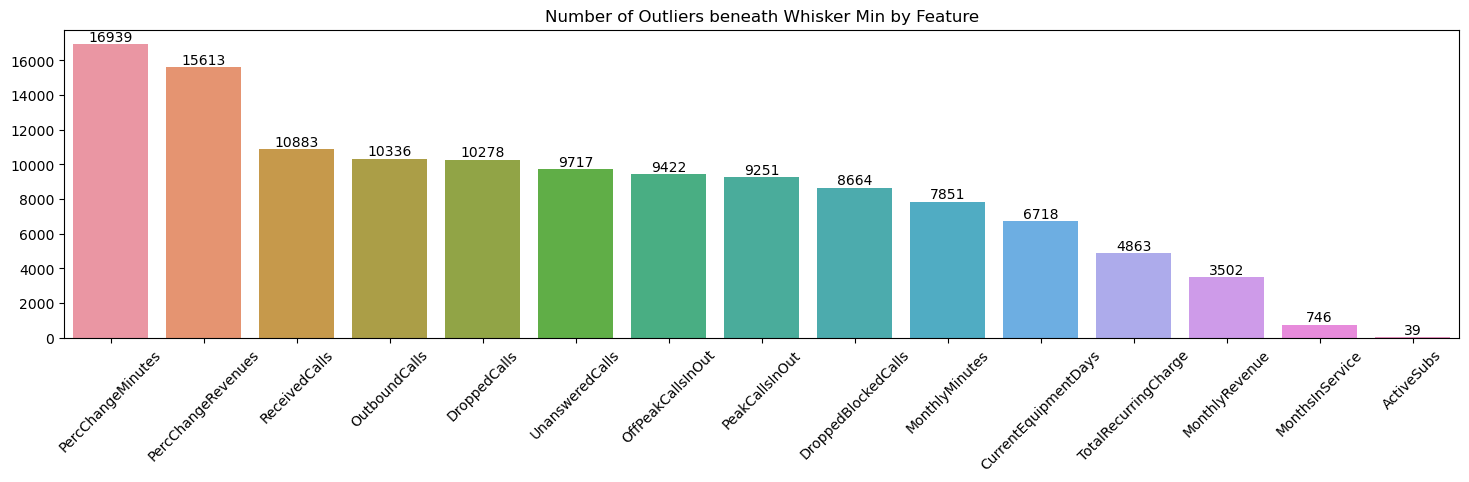

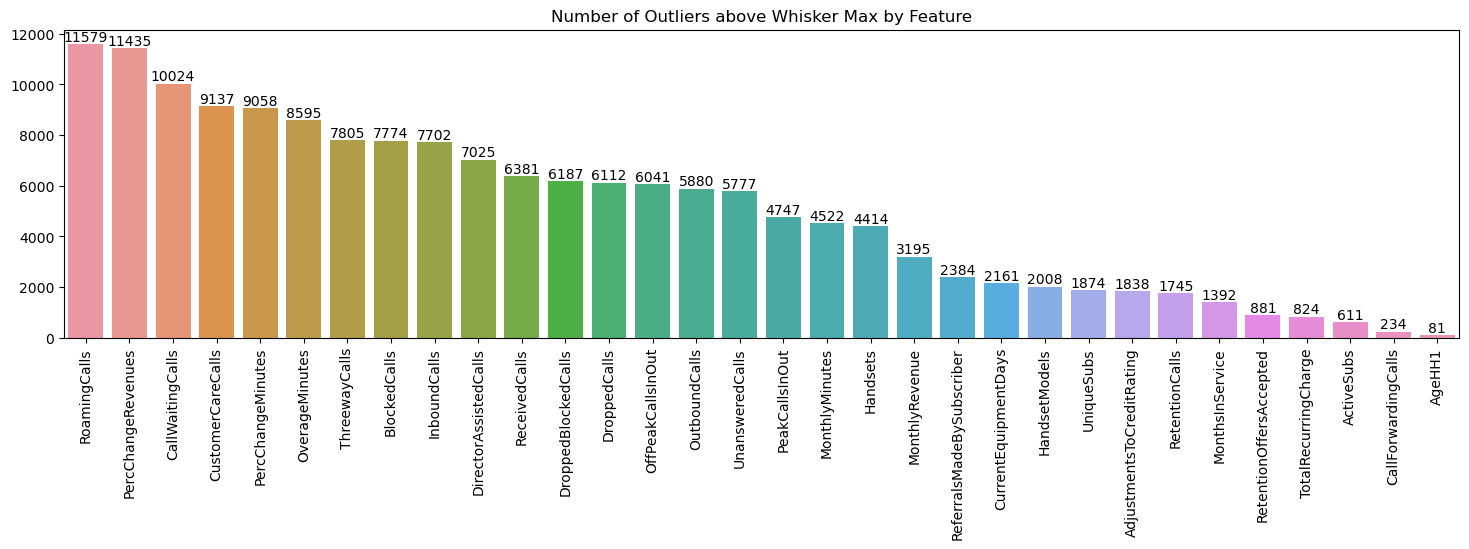

In [29]:
# visualising outliers 
plt.figure(figsize=(18,4))
ax = sns.barplot(outlier_df.sort_values(by='whiskerMin_under', ascending=False)[outlier_df['whiskerMin_under'] > 0], x='feature', y='whiskerMin_under')
ax.set_xlabel('')
ax.set_ylabel('')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=45)
plt.title("Number of Outliers beneath Whisker Min by Feature")

plt.figure(figsize=(18,4))
ax1 = sns.barplot(outlier_df.sort_values(by='whiskerMax_over', ascending=False)[outlier_df['whiskerMax_over'] > 0], x='feature', y='whiskerMax_over')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.bar_label(ax1.containers[0], fontsize=10)
plt.xticks(rotation=90)
plt.title("Number of Outliers above Whisker Max by Feature")

plt.show()

### Handling Data Types

Now we need to identify which features are numeric, binary, categorical and not ordinal, categorical and ordinal. The non-numeric features will need to have the appropriate encoding technique applied to transform them into usable data for our ML analysis.

In [30]:
data_uniques = pd.DataFrame([[i, len(data[i].unique()), data[i].dtype] for i in data.columns], columns=['feature', 'unique values', 'dtype']).set_index('feature')
pd.set_option('display.max_rows', None)
data_uniques.sort_values('unique values', ascending=False)

,unique values,dtype
feature,,
CustomerID,51047,int64
MonthlyRevenue,12665,float64
ReceivedCalls,6121,float64
PercChangeRevenues,2900,float64
MonthlyMinutes,2719,float64
PercChangeMinutes,2263,float64
PeakCallsInOut,1839,float64
OffPeakCallsInOut,1669,float64
CurrentEquipmentDays,1438,float64


In [31]:
# binary features
binary_features = list(data_uniques[data_uniques['unique values'] == 2].index)
binary_features

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

In [32]:
# check features in awkward zone between numerical and categorical
awkward_features = list(data_uniques[(data_uniques['unique values'] <= 60) & (data_uniques['unique values'] > 10)].index)
print([[i, list(data[i].unique())] for i in awkward_features])

[['CallForwardingCalls', [0.0, 0.3, 0.7, 2.0, 23.7, 1.7, 1.0, 51.7, 9.7, 16.0, 1.3, 33.7, 3.7, 2.7, 2.3, 26.3, 4.0, 6.3, 31.3, 5.0, 11.0, 3.0, 8.7, 10.7, 22.0, 12.0, 5.3, 21.0, 55.7, 81.3, 12.3]], ['MonthsInService', [61, 58, 60, 59, 53, 57, 55, 56, 54, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 29, 31, 30, 23, 24, 28, 12, 27, 26, 25, 8, 10, 22, 19, 21, 18, 20, 17, 15, 14, 16, 13, 11, 9, 7, 6]], ['UniqueSubs', [2, 1, 3, 5, 6, 4, 7, 12, 11, 9, 8, 10, 13, 18, 196]], ['ActiveSubs', [1, 2, 3, 4, 0, 5, 8, 6, 9, 53, 11, 7]], ['Handsets', [2.0, 1.0, 9.0, 4.0, 3.0, 10.0, 5.0, 8.0, 18.0, 7.0, 6.0, 24.0, 12.0, 11.0, 14.0, 13.0, 17.0, 16.0, 21.0, 19.0, 15.0, 22.0, 20.0]], ['HandsetModels', [2.0, 1.0, 4.0, 3.0, 5.0, 6.0, 9.0, 7.0, 10.0, 8.0, 11.0, 15.0, 14.0]], ['AgeHH1', [62.0, 40.0, 26.0, 30.0, 46.0, 28.0, 52.0, 36.0, 0.0, 58.0, 99.0, 48.0, 42.0, 74.0, 50.0, 64.0, 72.0, 44.0, 76.0, 54.0, 38.0, 68.0, 56.0, 32.0, 60.0, 34.0, 88.0, 70.0, 80.0, 82.0, 24.0, 66

It's not clear what the **CallForwardingCalls** is representing. It is incrementing from 0.3 and 0.4. This doesn't make sense to me as Call Forwarding is when somebody redirects a telephone call to another destination so you would think that it'd just be a count of 1 representing 1 instance. Since we can't make sense of the feature we will have to drop it.

It's also hard to tell what the **Handsets** and **HandsetModels** are representing. I would have thought that the values in these features would be names of various handsets and models. It might be some kind of mapping but without the information we can't derive any value from that anyway. There can only be one handset assigned to one CCA agreement so it can't be number of handsets. We'll have to drop these columns as a result. 

In [33]:
pd.DataFrame(data['MonthsInService'].value_counts()).reset_index().sort_values(by='MonthsInService',ascending=True).reset_index().drop(columns='index')

,MonthsInService,count
0,6,746
1,7,2821
2,8,2214
3,9,2477
4,10,2381
5,11,3599
6,12,2737
7,13,2719
8,14,2291
9,15,1871


We can see that the difference (6) between the index and **MonthsInService** value is consistent throughout the entire dataframe so this is an ordinal feature, likely representing the contract length in months that the customer has been with the company.

In [34]:
data['UniqueSubs'].value_counts()

UniqueSubs
1      32109
2      13852
3       3212
4       1219
5        421
6        147
7         49
9         12
8         10
10         6
12         3
11         3
13         2
18         1
196        1
Name: count, dtype: int64

This is a categorical column and represents the number of subscriptions each customer has on their account. The vast majority are 1 or 2 as you'd expect. For a customer to have 196 subscriptions on their account is pretty staggering. Unless this is a company account but for the purpose of the analysis we only want to analyse individual customer records. Since there is only 1 record we can just remove it from the dataset and move on.

In [35]:
# transform age column to integer
data['AgeHH1'] = data['AgeHH1'].astype(np.int64)

In [37]:
categorical_features = list(data_uniques[(data_uniques['unique values'] <= 43) & (data_uniques['unique values'] > 2) ].index)
print([[i, list(data[i].unique())] for i in categorical_features])

[['CallForwardingCalls', [0.0, 0.3, 0.7, 2.0, 23.7, 1.7, 1.0, 51.7, 9.7, 16.0, 1.3, 33.7, 3.7, 2.7, 2.3, 26.3, 4.0, 6.3, 31.3, 5.0, 11.0, 3.0, 8.7, 10.7, 22.0, 12.0, 5.3, 21.0, 55.7, 81.3, 12.3]], ['UniqueSubs', [2, 1, 3, 5, 6, 4, 7, 12, 11, 9, 8, 10, 13, 18, 196]], ['ActiveSubs', [1, 2, 3, 4, 0, 5, 8, 6, 9, 53, 11, 7]], ['Handsets', [2.0, 1.0, 9.0, 4.0, 3.0, 10.0, 5.0, 8.0, 18.0, 7.0, 6.0, 24.0, 12.0, 11.0, 14.0, 13.0, 17.0, 16.0, 21.0, 19.0, 15.0, 22.0, 20.0]], ['HandsetModels', [2.0, 1.0, 4.0, 3.0, 5.0, 6.0, 9.0, 7.0, 10.0, 8.0, 11.0, 15.0, 14.0]], ['AgeHH1', [62, 40, 26, 30, 46, 28, 52, 36, 0, 58, 99, 48, 42, 74, 50, 64, 72, 44, 76, 54, 38, 68, 56, 32, 60, 34, 88, 70, 80, 82, 24, 66, 22, 78, 84, 20, 94, 86, 90, 18, 92, 98, 96]], ['RetentionCalls', [1, 0, 3, 2, 4]], ['RetentionOffersAccepted', [0, 1, 2, 3]], ['ReferralsMadeBySubscriber', [0, 1, 2, 3, 4, 7, 5, 6, 16, 11, 8, 9, 35]], ['IncomeGroup', [4, 5, 6, 9, 1, 7, 3, 0, 8, 2]], ['AdjustmentsToCreditRating', [0, 1, 3, 2, 5, 4, 9, 6

In [38]:
data['PrizmCode'].value_counts(normalize=True)

PrizmCode
Other       0.482986
Suburban    0.320842
Town        0.148667
Rural       0.047505
Name: proportion, dtype: float64

Again, this time we have almost 50% of unknown / missing data in the **PrizmCode** feature categorised as 'Other'. To stay consistent we will drop this column as well.

In [39]:
data['Occupation'].value_counts(normalize=True)

Occupation
Other           0.737301
Professional    0.171509
Crafts          0.029757
Clerical        0.019316
Self            0.017219
Retired         0.014359
Student         0.007464
Homemaker       0.003076
Name: proportion, dtype: float64

Same situation with the **Occupation** feature.

In [40]:
# CreditRating is an ordinal column but we need to transform it first
CreditRating_mapping = {'1-Highest':1, '2-High':2, '3-Good':3, '4-Medium':4, '5-Low':5, '6-VeryLow':6, '7-Lowest':7}
data['CreditRating'] = data['CreditRating'].map(CreditRating_mapping)

In [42]:
#MaritalStatus feature has missing data classified as "Unknown"
data['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Unknown    0.385919
Yes        0.365369
No         0.248712
Name: proportion, dtype: float64

This is essentially 40% of missing data. Again, this is too much missing data to transform. We will again remove this feature from the dataset. 

In [43]:
data.drop(columns=['MaritalStatus','Occupation','PrizmCode','CallForwardingCalls','Handsets', 'HandsetModels', 'ServiceArea', 'CustomerID'], inplace=True)
data.drop(index=data[data['UniqueSubs'] == 196].index[0], inplace=True)

Final Assignments

In [44]:
binary_features = ['Churn','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','MadeCallToRetentionTeam']

In [47]:
ordinal_features = ['IncomeGroup', 'CreditRating', 'MonthsInService']

In [46]:
categorical_features = list(data_uniques[(data_uniques['unique values'] <= 43) & (data_uniques['unique values'] > 2) ].index)
categorical_features.remove('Handsets')
categorical_features.remove("HandsetModels")
categorical_features.remove("MaritalStatus")
categorical_features.remove("CallForwardingCalls")
categorical_features.remove("PrizmCode")
categorical_features.remove("Occupation")
categorical_features.remove("CreditRating")
categorical_features.remove('IncomeGroup')
categorical_features

['UniqueSubs',
 'ActiveSubs',
 'AgeHH1',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating',
 'CreditRating']

In [57]:
numerical_features = list(set(data.columns) - set(ordinal_features) - set(categorical_features) - set(binary_features)) 

In [58]:
numerical_features

['DroppedBlockedCalls',
 'MonthlyRevenue',
 'PercChangeMinutes',
 'DirectorAssistedCalls',
 'DroppedCalls',
 'CurrentEquipmentDays',
 'PercChangeRevenues',
 'RoamingCalls',
 'ReceivedCalls',
 'PeakCallsInOut',
 'TotalRecurringCharge',
 'MonthlyMinutes',
 'CustomerCareCalls',
 'OffPeakCallsInOut',
 'OverageMinutes',
 'BlockedCalls',
 'InboundCalls',
 'UnansweredCalls',
 'CallWaitingCalls',
 'OutboundCalls',
 'ThreewayCalls']

Double-check everything has been split accurately:

In [101]:
data_type_cols = numerical_features + categorical_features + binary_features + ordinal_features

In [102]:
data_type_df = pd.DataFrame(data_type_cols).sort_values(by=0, ascending=True).rename(columns={0:'data_df_feature'}).reset_index().drop(columns='index')
data_df = pd.DataFrame(list(data.columns)).sort_values(by=0, ascending=True).rename(columns={0:'data_df_feature'}).reset_index().drop(columns='index')
data_df.join(data_type_df, how='outer',lsuffix='_data', rsuffix='_data_type')

,data_df_feature_data,data_df_feature_data_type
0,ActiveSubs,ActiveSubs
1,AdjustmentsToCreditRating,AdjustmentsToCreditRating
2,AgeHH1,AgeHH1
3,BlockedCalls,BlockedCalls
4,BuysViaMailOrder,BuysViaMailOrder
5,CallWaitingCalls,CallWaitingCalls
6,ChildrenInHH,ChildrenInHH
7,Churn,Churn
8,CreditRating,CreditRating
9,CurrentEquipmentDays,CurrentEquipmentDays


In [103]:
data.shape

(51046, 48)

In [104]:
len(numerical_features) + len(categorical_features) + len(binary_features) + len(ordinal_features)

48

### Encoding

### Robust Standardization 

Since their is quite a high prevalence of outliers throughout the dataset, we are not going to eliminate them or remove any useful data because of this reason. Considering the nature of the dataset we are dealing with customer behaviour data so these outliers can actually have a lot of insight into customer behavioural trends. We will instead treat them using `robust data scaling`. We use this method instead of the routine StandardScaler as our parameters will not be skewed by the presence of outliers for the former method. Additionaly, this scaler method provides robust scaling, preserves relationships, and can handle both continuous and categorical data effectively - so it is definitely our best choice!

In [76]:
numerical_data.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,1,0,0,4,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,0,0,0,5,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,0,0,0,6,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0,0,0,6,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,0,0,0,9,1


In [31]:
from sklearn.preprocessing import RobustScaler
numerical_data_transformed = RobustScaler().fit_transform(X=numerical_data)
numerical_data_robust = pd.DataFrame(numerical_data_transformed, columns=list(numerical_data.columns))
numerical_data_robust.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,-0.655764,-0.261101,-0.766667,0.000000,-0.075,0.0,-1.027211,-2.213018,-0.328571,-0.081081,-0.322581,0.000000,0.000000,0.305785,-0.446254,-0.215054,-0.040692,-0.150579,-0.377358,0.0,0.000000,3.461538,1.0,0.0,1.0,1.0,0.103226,0.541667,1.0,0.0,0.0,-0.142857,0.0
1,-0.843700,-0.632327,-0.933333,-0.252525,-0.075,0.0,0.013605,0.035503,-0.385714,-0.270270,-0.438710,0.000000,0.000000,-0.363636,-0.446254,-0.215054,-0.579858,-0.446589,-0.471698,0.0,-0.230769,3.230769,0.0,0.0,1.0,0.0,3.790323,0.083333,0.0,0.0,0.0,0.000000,0.0
2,-0.280429,-0.635879,-0.233333,-0.252525,-0.075,0.0,0.027211,0.035503,-0.428571,-0.270270,-0.525806,0.000000,0.000000,-0.360882,-0.436482,-0.215054,-0.617497,-0.411840,-0.500000,0.0,-0.230769,3.384615,0.0,0.0,0.0,0.0,4.783871,-0.208333,0.0,0.0,0.0,0.142857,0.0
3,0.906702,1.680284,1.000000,1.000000,-0.075,0.0,1.108844,0.994083,7.000000,1.810811,1.925806,2.529412,4.333333,1.015840,11.615635,15.591398,5.022380,3.449163,5.132075,0.0,17.230769,3.307692,1.0,1.0,8.0,3.0,0.416129,-0.125000,0.0,0.0,0.0,0.142857,0.0
4,-0.839678,-0.650089,-0.933333,-0.252525,-0.075,0.0,0.040816,0.011834,-0.428571,-0.270270,-0.525806,0.000000,0.000000,-0.363636,-0.446254,-0.215054,-0.630722,-0.459459,-0.500000,0.0,-0.230769,2.846154,1.0,1.0,3.0,2.0,1.687097,0.208333,0.0,0.0,0.0,0.571429,1.0


In [35]:
from sklearn.preprocessing import LabelEncoder

encoding_list = []

for col in list(text_data.columns):
    le = LabelEncoder()
    encoded_values = le.fit_transform(text_data_copy[col])
    text_data_copy[col] = encoded_values
    mapping = {val: encode for val, encode in zip(le.classes_, le.transform(le.classes_))}
    encoding_list.append((col, mapping))

print(encoding_list)

[('ChildrenInHH', {'No': 0, 'Yes': 1}), ('HandsetRefurbished', {'No': 0, 'Yes': 1}), ('HandsetWebCapable', {'No': 0, 'Yes': 1}), ('TruckOwner', {'No': 0, 'Yes': 1}), ('RVOwner', {'No': 0, 'Yes': 1}), ('Homeownership', {'Known': 0, 'Unknown': 1}), ('BuysViaMailOrder', {'No': 0, 'Yes': 1}), ('RespondsToMailOffers', {'No': 0, 'Yes': 1}), ('OptOutMailings', {'No': 0, 'Yes': 1}), ('NonUSTravel', {'No': 0, 'Yes': 1}), ('OwnsComputer', {'No': 0, 'Yes': 1}), ('HasCreditCard', {'No': 0, 'Yes': 1}), ('NewCellphoneUser', {'No': 0, 'Yes': 1}), ('NotNewCellphoneUser', {'No': 0, 'Yes': 1}), ('OwnsMotorcycle', {'No': 0, 'Yes': 1}), ('MadeCallToRetentionTeam', {'No': 0, 'Yes': 1}), ('CreditRating', {'1-Highest': 0, '2-High': 1, '3-Good': 2, '4-Medium': 3, '5-Low': 4, '6-VeryLow': 5, '7-Lowest': 6}), ('PrizmCode', {'Other': 0, 'Rural': 1, 'Suburban': 2, 'Town': 3}), ('Occupation', {'Clerical': 0, 'Crafts': 1, 'Homemaker': 2, 'Other': 3, 'Professional': 4, 'Retired': 5, 'Self': 6, 'Student': 7}), ('Mari

In [36]:
text_data_copy.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,2,4,0
1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,3,2,4,2
2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,2,3,1,2
3,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,3,0,3,0
4,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,4,2


In [37]:
for col in list(text_data_copy.columns):
    print(f"{col}: {len(text_data_copy.loc[:,col].unique())}")

ChildrenInHH: 2
HandsetRefurbished: 2
HandsetWebCapable: 2
TruckOwner: 2
RVOwner: 2
Homeownership: 2
BuysViaMailOrder: 2
RespondsToMailOffers: 2
OptOutMailings: 2
NonUSTravel: 2
OwnsComputer: 2
HasCreditCard: 2
NewCellphoneUser: 2
NotNewCellphoneUser: 2
OwnsMotorcycle: 2
MadeCallToRetentionTeam: 2
CreditRating: 7
PrizmCode: 4
Occupation: 8
MaritalStatus: 3


Looks good!

In [43]:
# pickle encoding_list object for later reference
import pickle
pickle.dump(obj=encoding_list, file=open(file="Telecoms_encolding_list.pkl", mode='wb'))
# pickle.load(open("Telecoms_encolding_list.pkl", 'rb'))